## CONNECTTEL CUSTOMER CHURN PREDICTION

  ConnectTel is a leading telecommunications company at the forefront of innovation and connectivity solutions. With a strong presence in the global market, ConnectTel has established itself as a trusted provider of reliable voice, data, and Internet 
services. Offering a comprehensive range of telecommunications solutions, including mobile networks , broadband connections, and enterprise solutions.
   ConnectTel Telecom Company faces the pressing need to address customer churn, which poses a significant threat to its business sustainability and growth.
   To look into the customer churn behaviour and as well to predict the churn rate, the data provided will be analysed as follows 

## Problem Statement and Objectives
- The problem statement for this predictive project is to develop a robust customer churn prediction system for ConnectTel.
- The objective is to accurately forecast which customers are likely to churn (i.e. discontinue their services) based on historical customer data. 


## Methodology
- Data Overview and Exploratory data analysis (EDA)
- Supervised Machine Learning , a classification analysis
- Preparing and processing Data for Modelling, Variable encoding ,Missing data handling, Data Segmentation , Scaling and data normalization
- Model Building ,Training and prediction ( Naïve Bayes Classifier, Random Forest classifier, Xgboost Classifier and Support Vector Classifier 
- Model Evaluation metrics ( Classification report and Confusion matrix)
- Model Optimization/ Hyperparameter and Feature Importance


In [47]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [48]:
data = pd.read_csv('Customer-Churn.csv')

## Data Overview

In [49]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Features in the dataset and meaning:
- customerID: A unique identifier assigned to each telecom customer
- gender: The gender of the customer, which can be categorized as male, or female
- Senior Citizen: A binary indicator that identifies whether the customer is a senior citizen or not
- Partner Dependents: Indicates whether the customer has a partner or not
- Dependants : Indicates whether the customer has dependents or not.
- tenure : The duration for which the customer has been subscribed to the telecom service
- PhoneService: Indicates whether the customer has a phone service or not
- MultipleLines: Indicates whether the customer has multiple lines or not
- InternetService: Indicates the type of internet service subscribed by the customer, such as DSL, fiber optic, or no internet service
- OnlineSecurity: Indicates whether the customer has online security services or not.
- OnlineBackup : Indicates whether the customer has online backup services or not
- Device Protection: Indicates whether the customer has device protection services or not
- Tech Support: Indicates whether the customer has technical support services or not
- StreamingTV: Indicates whether the customer has streaming TV services or not
- StreamingMovies: Indicates whether the customer has streaming movie services or not (1= yes, 2=no, 3= no internet service)
- Contract: Indicates the type of contract the customer has, such as a month-to-month, one-year, or two-year contract.
- PaperlessBilling: Indicates whether the customer has opted for paperless billing or not
- PaymentMethod: Indicates the method of payment used by the customer, such as electronic checks, mailed checks, bank transfers, or credit cards
- MonthlyCharges: The amount charged to the customer on a monthly basis
- TotalCharges: The total amount charged to the customer over the entire tenure.
- Churn: The target variable indicates whether the customer has churned (canceled the service) or not. (1= yes, 0= no)

In [50]:
#Closer look of our target variables
data.Churn.value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [52]:
#Convert TotalCharges from object to float
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'],errors = 'coerce')
data['TotalCharges'] = data['TotalCharges'].astype(np.float64)

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [54]:
data[data.duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [55]:
data.duplicated().sum()

0

In [56]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

After converting Totalcharges from string to foat, 11 missing values were detected 

In [57]:
#checking statiscal description
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [58]:
# statistical description of categorical data
data.describe(exclude={"float64","int64"}).T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


## Exploratory Data Analysis (EDA)

In [59]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Univariate Analysis

#### Numerical Univariate analysis

<Axes: xlabel='tenure', ylabel='Count'>

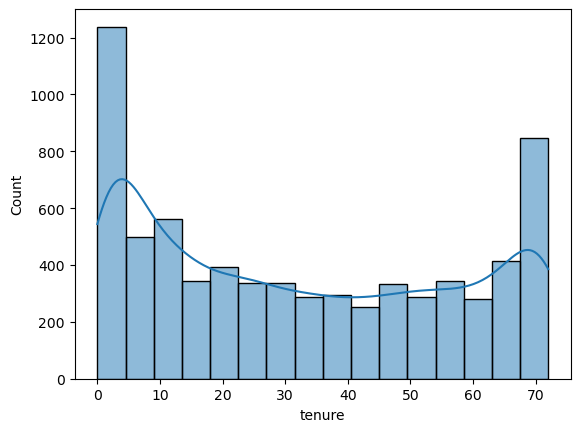

In [60]:
#univariate distribution of tenure
sb.histplot(data['tenure'],kde=True)

In [61]:
from scipy.stats import skew, kurtosis

print(data['tenure'].skew())
print(data['tenure'].kurtosis())

0.2395397495619829
-1.387371635971685


This appear as a normal distribution

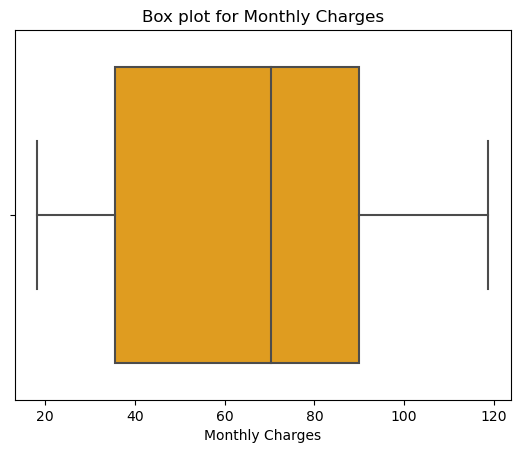

In [62]:
sb.boxplot(x ='MonthlyCharges',data= data, orient= 'h', color='orange')
plt.xlabel("Monthly Charges")
plt.title("Box plot for Monthly Charges")
plt.show()

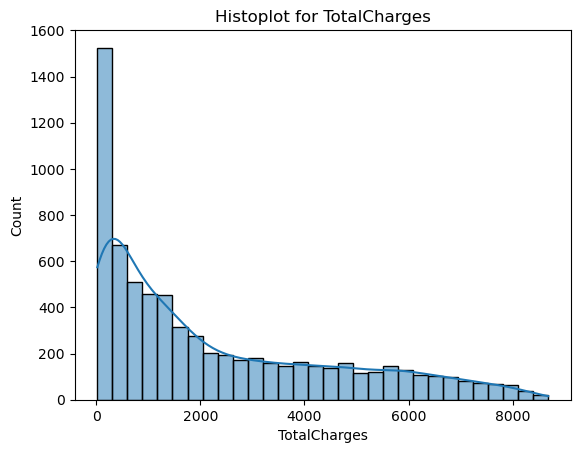

In [63]:
sb.histplot(data['TotalCharges'],kde=True,bins= 30)
plt.title("Histoplot for TotalCharges")
plt.show()

This indicates a positively skewed distribution. The tail of the distribution contains higher values, extending towards the end of the x-axis. Consequently, it can be inferred that outliers are present.

### Univariate for Categorical Data

In [64]:
data.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [65]:
#function that calculates and adds pecentage to graph plots
def perc_plot(plot,feature):
  total = len(feature)
  for p in plot.patches:
    perc = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(perc,(x,y), size=12)
  plt.show()

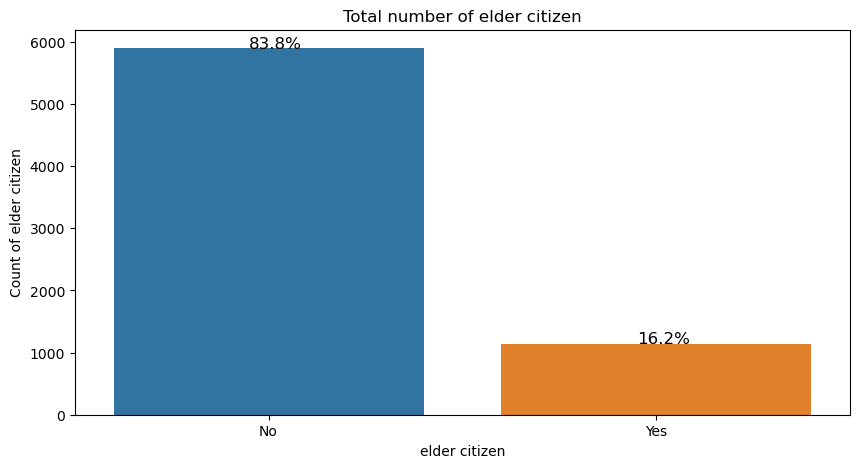

In [66]:
#covert the seniorcitizen feature(1,0) into a categorical feature for descriptive analysis
#seniorcitizen
def elder_citizen(SeniorCitizen):
     if SeniorCitizen == 1:
        return "Yes"
     else:
        return "No"
    
data['elder_citizen'] = data['SeniorCitizen'].apply(elder_citizen)

#investigating the gender of patients
plt.figure(figsize = (10,5))
ax = sb.countplot(x= 'elder_citizen', data=data)
plt.xlabel('elder citizen')
plt.ylabel('Count of elder citizen')
plt.title('Total number of elder citizen')
perc_plot(ax,data.elder_citizen)


I observe that 16.2% of the population comprises elder citizens, while the remaining 83.8% consists of younger citizens.

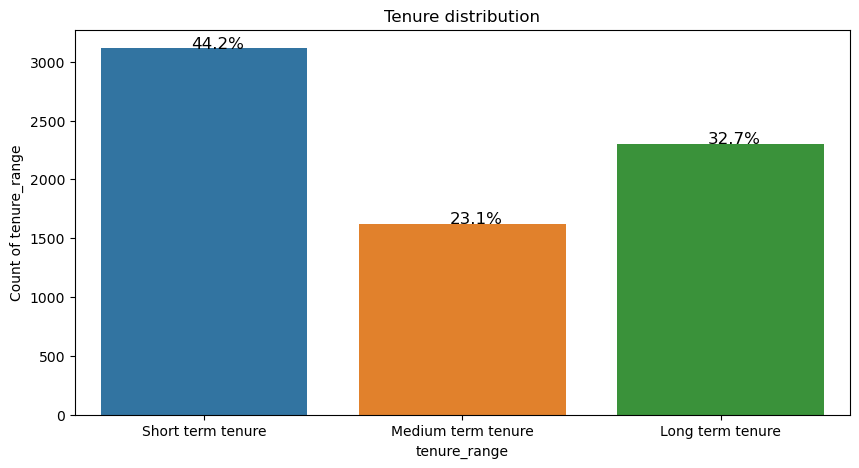

In [67]:
#categorize tenure into short, medium and long term 
#seniorcitizen
def tenure_range(tenure):
     if tenure <= 23:
        return "Short term tenure"
     if tenure <= 47:
        return "Medium term tenure"
     else:
        return "Long term tenure"
    
data['tenure_range'] = data['tenure'].apply(tenure_range)

#investigating the gender of patients
plt.figure(figsize = (10,5))
ax = sb.countplot(x= 'tenure_range', data=data)
plt.xlabel('tenure_range')
plt.ylabel('Count of tenure_range')
plt.title('Tenure distribution')
perc_plot(ax,data.tenure_range)


In [68]:
from collections import Counter

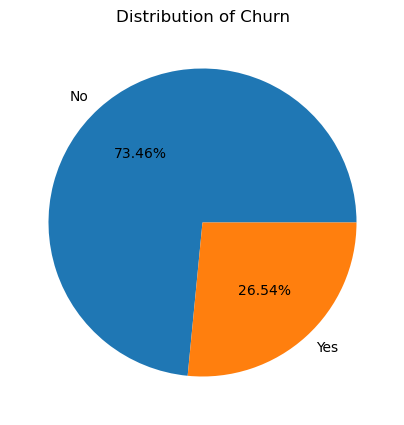

In [69]:
#Chun distribution
Fig,ax = plt.subplots(figsize=(5,5))
count = Counter(data["Churn"])
ax.pie(count.values(),labels=count.keys(),autopct=lambda p:f'{p:.2f}%')
ax.set_title("Distribution of Churn")
plt.show();


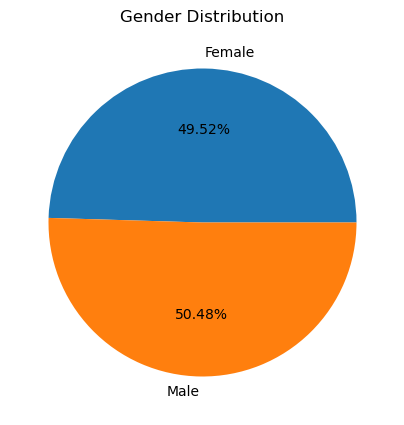

In [70]:
Fig,ax = plt.subplots(figsize=(5,5))
count = Counter(data["gender"])
ax.pie(count.values(), labels=count.keys(),autopct=lambda p:f'{p:.2f}%')
ax.set_title("Gender Distribution")
plt.show();


we have 26.54% of people who have churned and 73.46% who didn't

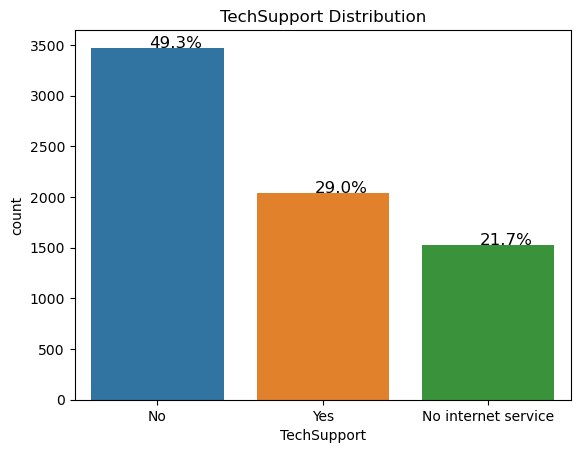

In [71]:
#TechSupport distribution
ax= sb.countplot(x="TechSupport",data=data)
plt.title('TechSupport Distribution')
perc_plot(ax,data.TechSupport)

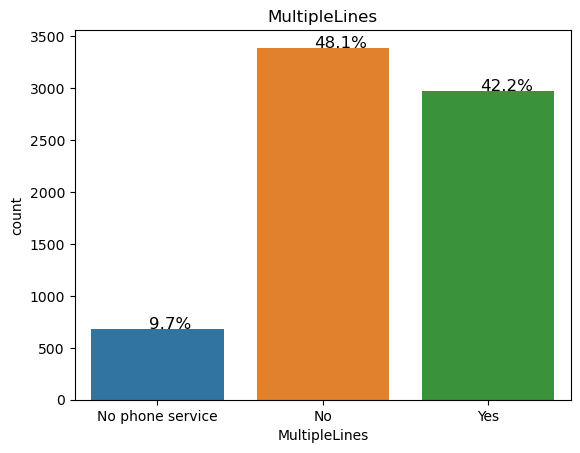

In [72]:
ax = sb.countplot(x="MultipleLines",data=data)
plt.title('MultipleLines')
perc_plot(ax,data.MultipleLines)

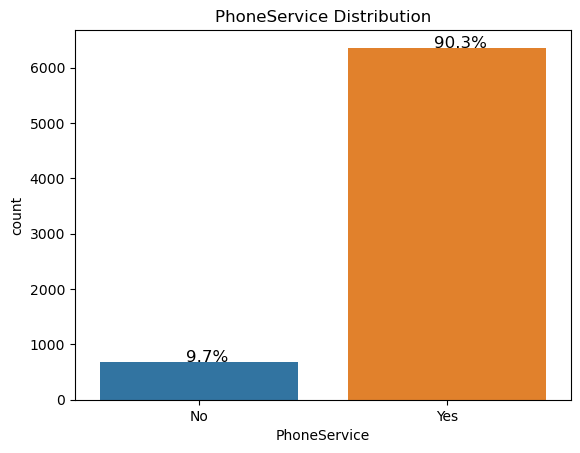

In [73]:
ax = sb.countplot(x="PhoneService",data=data)
plt.title('PhoneService Distribution')
perc_plot(ax,data.PhoneService)

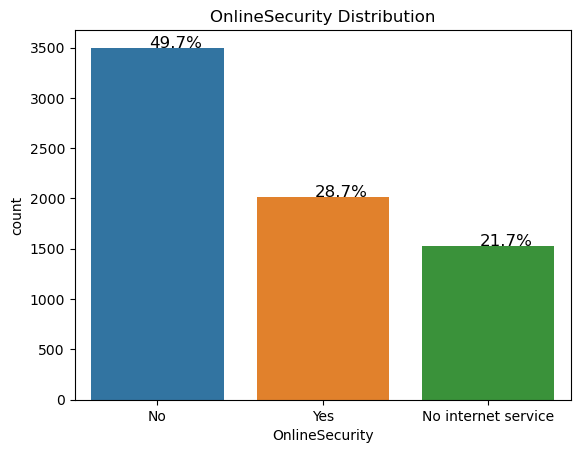

In [74]:
ax = sb.countplot(x="OnlineSecurity",data=data)
plt.title('OnlineSecurity Distribution')
perc_plot(ax,data.OnlineSecurity)

In [75]:
cat_var = data.select_dtypes(include ="object")

In [76]:
cat_var.columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn',
       'elder_citizen', 'tenure_range'],
      dtype='object')

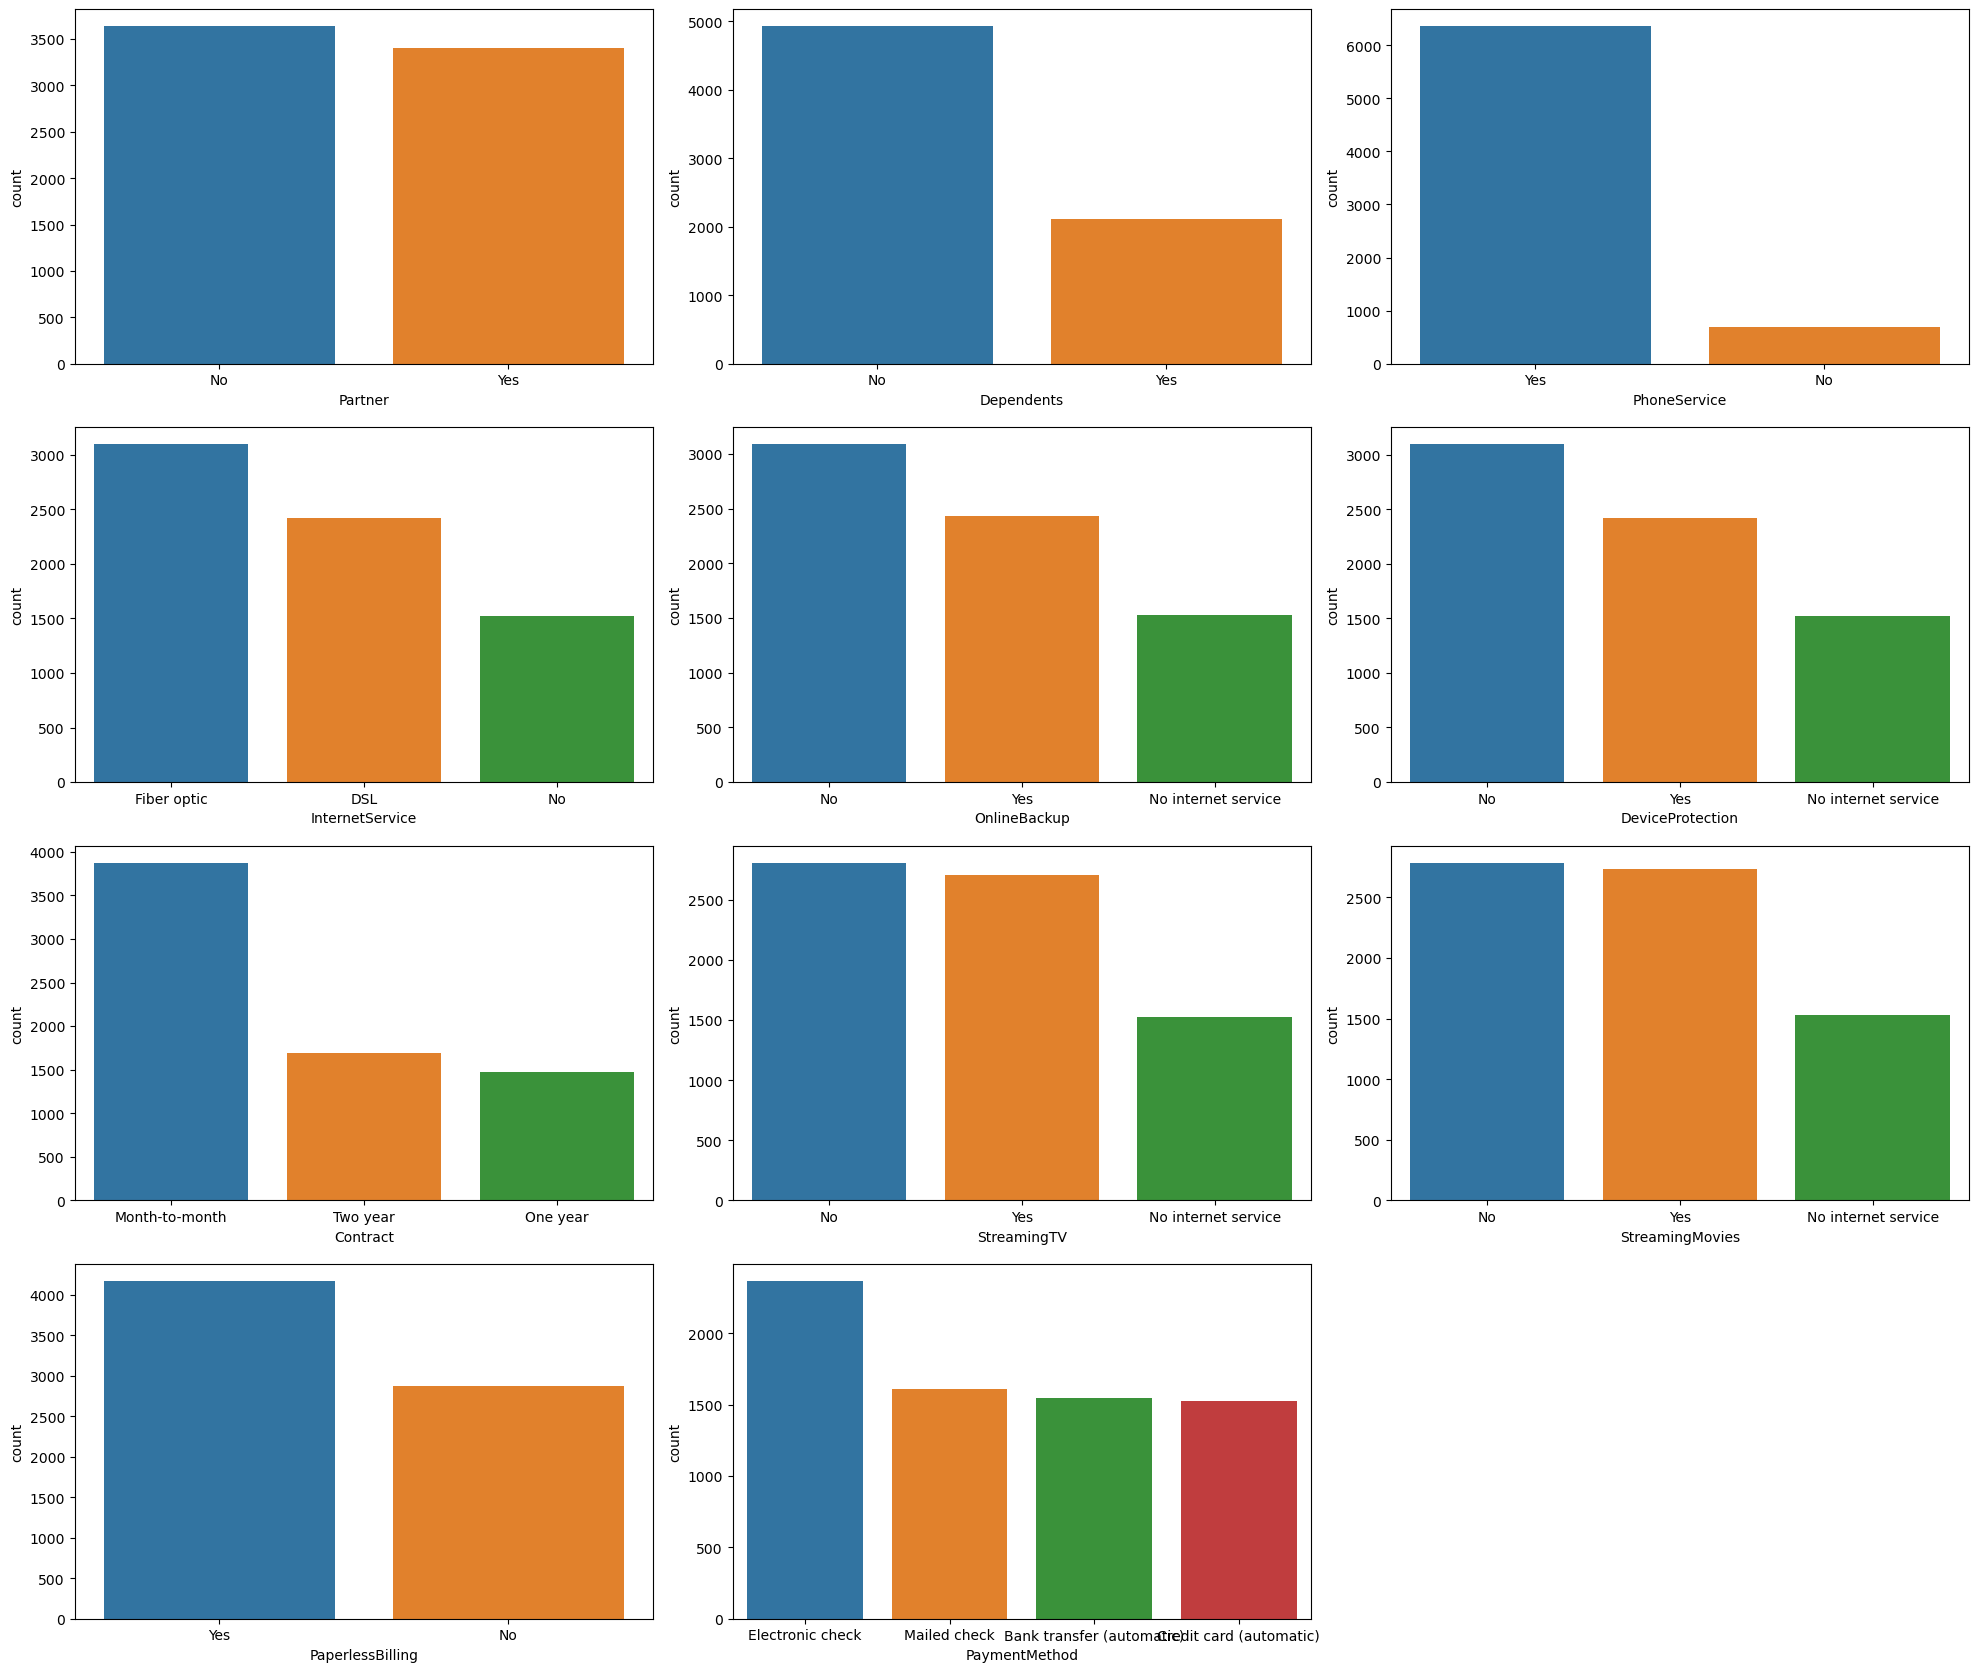

In [77]:
feature_list = ['Partner', 'Dependents', 'PhoneService', 
       'InternetService', 'OnlineBackup', 'DeviceProtection',
       'Contract', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod']

num_cols = 3
num_rows = (len(feature_list) + 1)//2

fig,axes = plt.subplots( ncols=num_cols ,nrows=num_rows, figsize = (20,25))
axes = axes.flatten()

for index, feature in enumerate(feature_list):
   
    sb.countplot(data = data, x = feature, ax =  axes[index], order = data[feature].value_counts().index)

plt.tight_layout()

for ax in axes[11:]:
    fig.delaxes(ax)





### Bivariate Analysis

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

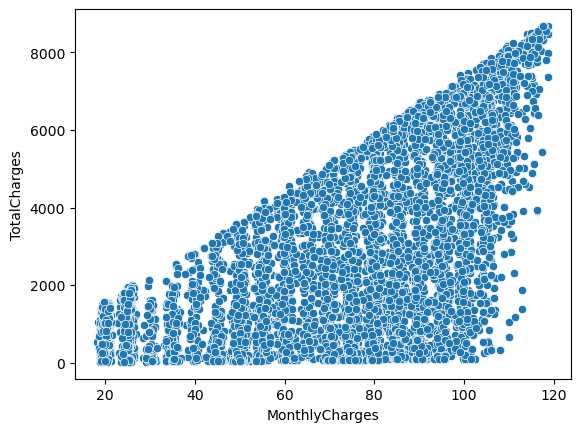

In [78]:
sb.scatterplot(x='MonthlyCharges',y='TotalCharges',data=data)

This indicates a linear relationship between monthly charges and total charges

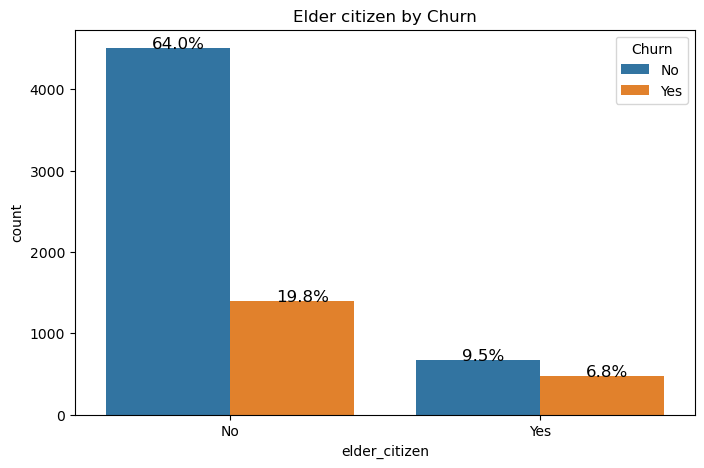

In [79]:
plt.figure(figsize=(8,5))
ax = sb.countplot(x='elder_citizen',hue='Churn',data=data)
plt.title('Elder citizen by Churn')
perc_plot(ax,data.elder_citizen)

In the comparison between the two age groups, younger citizens exhibit a substantially higher churn rate compared to elder citizens. Specifically, among young citizens, the churn rate is notably higher at 19.8%, whereas among elder citizens, it is lower at 6.8%. Again, the percentage of young citizens who do not churn is 64.0%, exceeding the percentage of elder citizens who do not churn at 9.5%. Overall, when considering the entire population of each age group, the churn rate of elder citizens can be concluded as relatively high

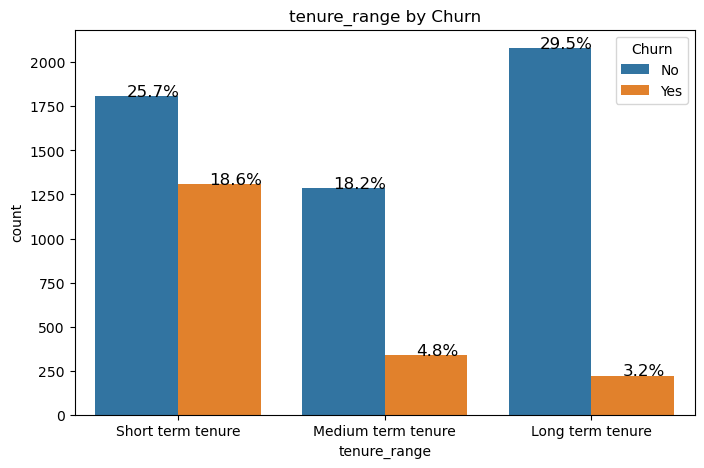

In [80]:
plt.figure(figsize=(8,5))
ax = sb.countplot(x='tenure_range',hue='Churn',data=data)
plt.title('tenure_range by Churn')
perc_plot(ax,data.tenure_range)

This analysis, indicate that customers who belong to the short term tenure churn most with 18.6% churn rate. Also, the long term tenure customers have the highest retention rate of 29.5%.

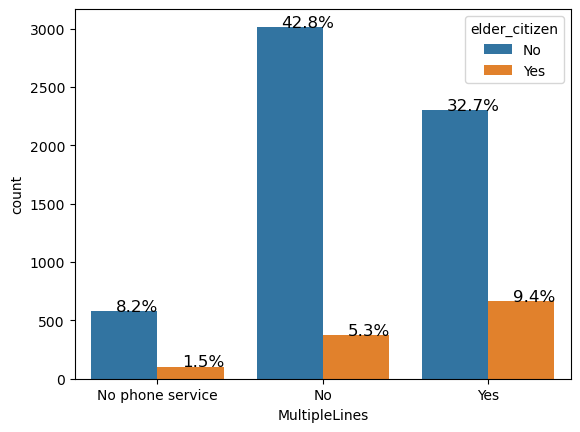

In [81]:
ax = sb.countplot(x='MultipleLines',hue= 'elder_citizen',data=data)
perc_plot(ax,data.InternetService);

Analyzing the use of multiple lines across different age groups reveals interesting patterns. Among elder citizens, there are more individuals with multiple lines (9.5%) compared to those without multiple lines (5.3%). On the contrary, among young citizens, a higher percentage of youth do not have multiple lines (42.8%) compared to those who do (32.7%). Additionally, individuals who indicated no phone service record 1.5% with multiple lines and 8.2% without multiple lines.

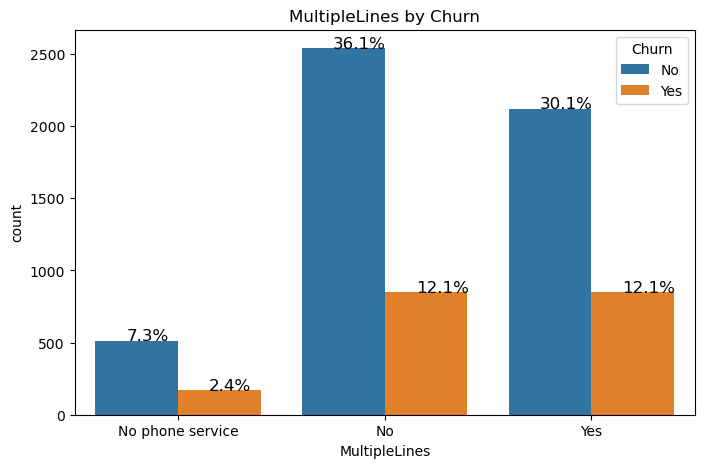

In [82]:
plt.figure(figsize=(8,5))
ax = sb.countplot(x='MultipleLines',hue='Churn',data=data)
plt.title('MultipleLines by Churn')
perc_plot(ax,data.MultipleLines)

In the category of customers with no phone service, the churn rate is 2.4%, while the retention rate is 7.3%.

For customers without multiple lines, the churn rate is higher at 12.1%, with a retention rate of 36.1%.

On the other hand, customers with multiple lines also exhibit a churn rate of 12.1%, with a slightly lower retention rate of 30.1%.

Across these categories, we observe varying churn and retention rates. Notably, individuals with multiple lines experience a relatively higher churn rate at 12.1%, alongside a retention rate of 30.1%. Conversely, although a higher percentage of individuals are without multiple lines, there is a larger proportion of both retention and churn.

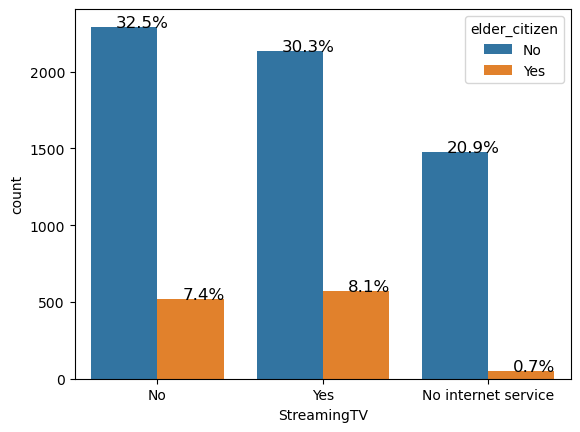

In [83]:
ax = sb.countplot(x='StreamingTV',hue= 'elder_citizen',data=data)
perc_plot(ax,data.StreamingTV);

In general, this visualization reveals a higher proportion of youth compared to elder citizens. Internet streaming with TV is more prevalent among young citizens, accounting for 30.3%, while among elder citizens, it's notably lower at 8.1%. Conversely, individuals who stated no internet service represent 20.9% of youth and only 0.7% of elder citizens. Lastly, those who claimed they don't stream with TV comprise 32.6% of youth and 7.4% of elder citizens

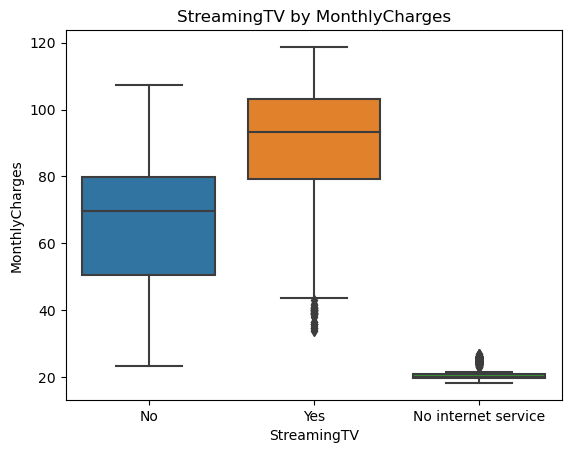

In [84]:
sb.boxplot(x='StreamingTV',y='MonthlyCharges',data=data)
plt.title('StreamingTV by MonthlyCharges');


People who stream the network with TV tend to have high monthly charges, whereas those who do not stream with TV typically have lower monthy charges, and also accompanied by outliers

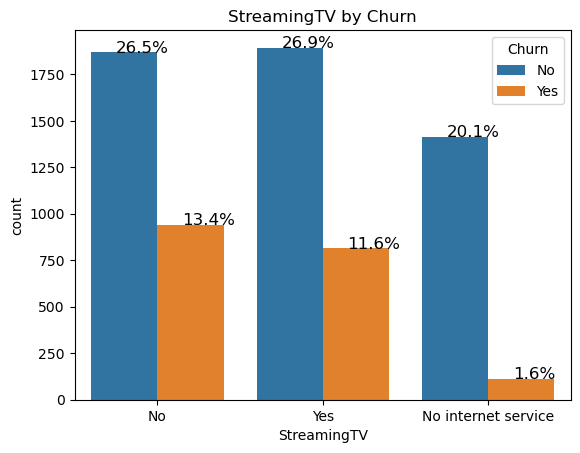

In [85]:
ax = sb.countplot(x='StreamingTV',hue= 'Churn',data=data)
plt.title('StreamingTV by Churn')
perc_plot(ax,data.StreamingTV);

Another analysis delved deeper into the categories of individuals streaming TV in relation to churn rate. The churn rate among people streaming with TV is relatively low at 11.6% compared to those not streaming TV. Additionally, those who stated not having internet service also recorded a low churn rate of 1.6%

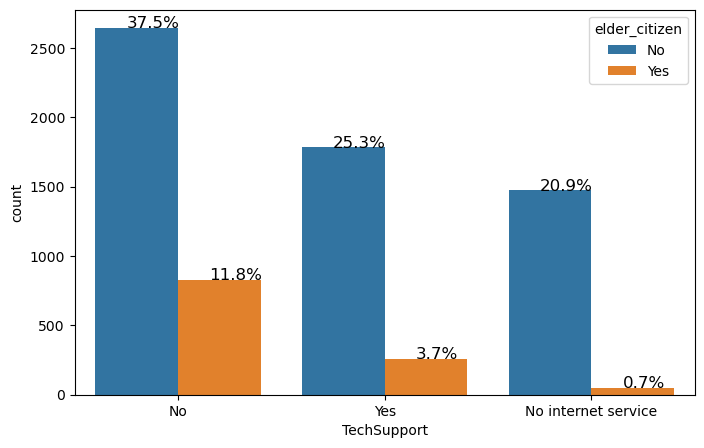

In [86]:
plt.figure(figsize=(8,5))
ax = sb.countplot(x='TechSupport',hue='elder_citizen',data=data)
perc_plot(ax,data.TechSupport);

In this analysis of tech support, it is visualized that among youth, 25.3% have tech support, 37.6% do not have tech support, and 20.9% have no service. Among elderly citizens, 3.7% have tech support, 11.8% do not have tech support, and 0.7% have no internet service.

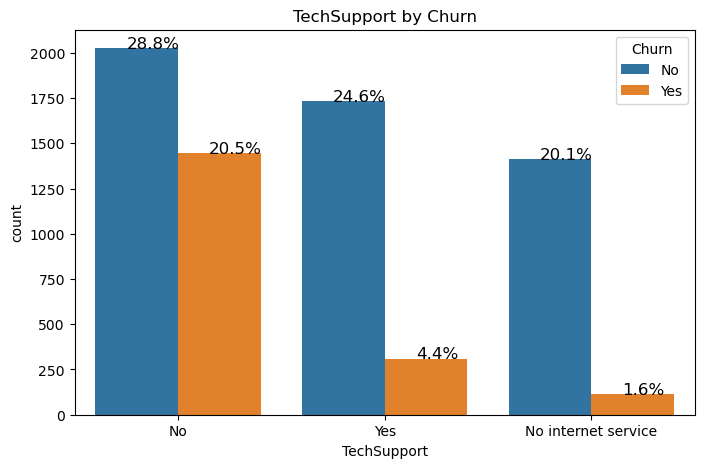

In [87]:
plt.figure(figsize=(8,5))
ax = sb.countplot(x='TechSupport',hue='Churn',data=data)
plt.title('TechSupport by Churn')
perc_plot(ax,data.TechSupport);

The churn rates among individuals with and without tech support are as follows:
  - 20.6% churn rate for people without tech support
  - 4.4% churn rate for people with tech support
  - 1.6% churn rate for individuals with no internet service.
Clearly, the absence of tech support could significantly influence the churn rate.


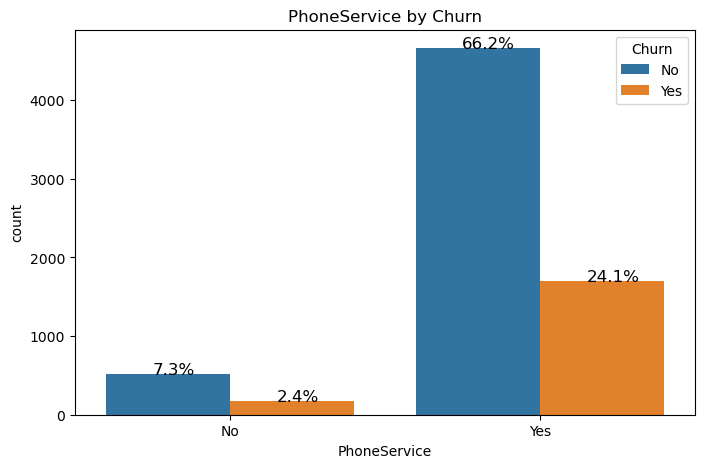

In [88]:
plt.figure(figsize=(8,5))
ax = sb.countplot(x='PhoneService',hue='Churn',data=data)
plt.title('PhoneService by Churn')
perc_plot(ax,data.PhoneService);

he analysis of phone service indicates that among individuals with phone service, the churn rate is 24.2%, while for those without phone service, it is 2.4%. It is evident that phone service may also influence the churn rate.

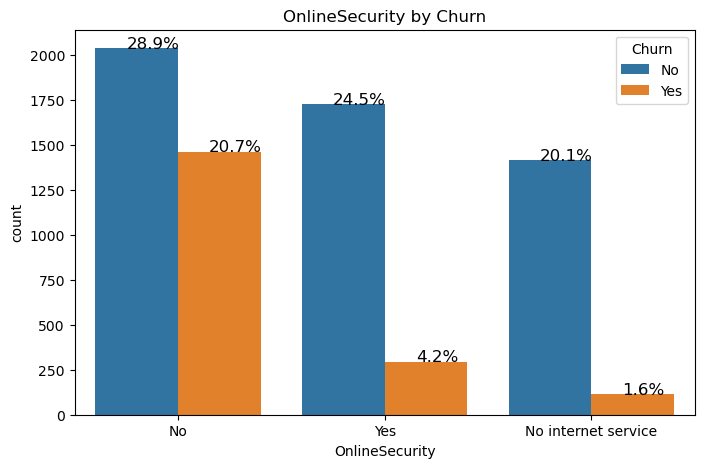

In [89]:
plt.figure(figsize=(8,5))
ax = sb.countplot(x='OnlineSecurity',hue='Churn',data=data)
plt.title('OnlineSecurity by Churn')
perc_plot(ax,data.OnlineSecurity);

These figures indicate that a significant proportion of individuals opt for month-to-month contracts, constituting 43.6% and 11.5% respectively. Following this, the next most common contract type is the two-year contract, accounting for 21.9% and 2.1%. Lastly, the one-year contract is chosen by 18.2% and 2.7% of individuals."


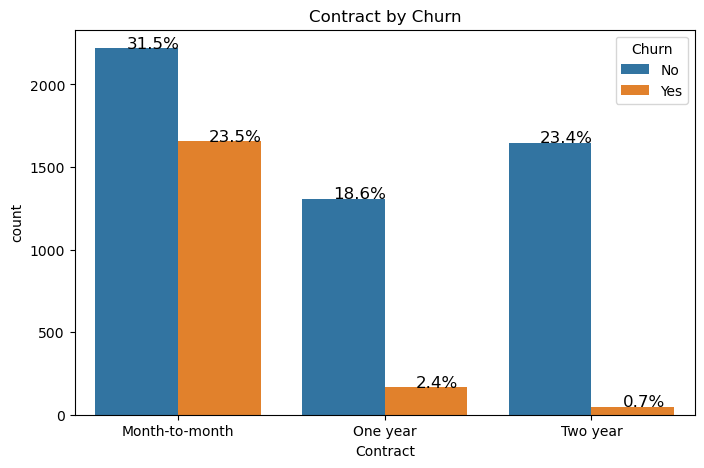

In [90]:
plt.figure(figsize=(8,5))
ax = sb.countplot(x='Contract',hue='Churn',data=data)
plt.title('Contract by Churn')
perc_plot(ax,data.Contract);

A significant churn rate is evident among individuals with month-to-month subscriptions, at 23.5%. In contrast, those with a one-year contract exhibit a lower churn rate of 2.4%, while individuals with a two-year contract have an even lower churn rate of 0.7%.

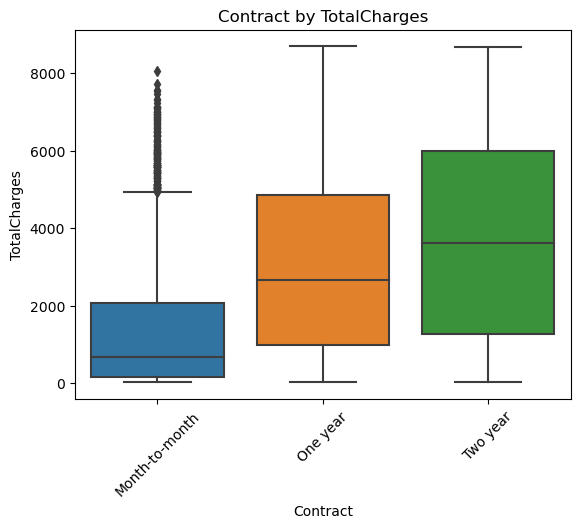

In [91]:
sb.boxplot(x='Contract',y='TotalCharges',data=data)
plt.title('Contract by TotalCharges')
plt.xticks(rotation=45);

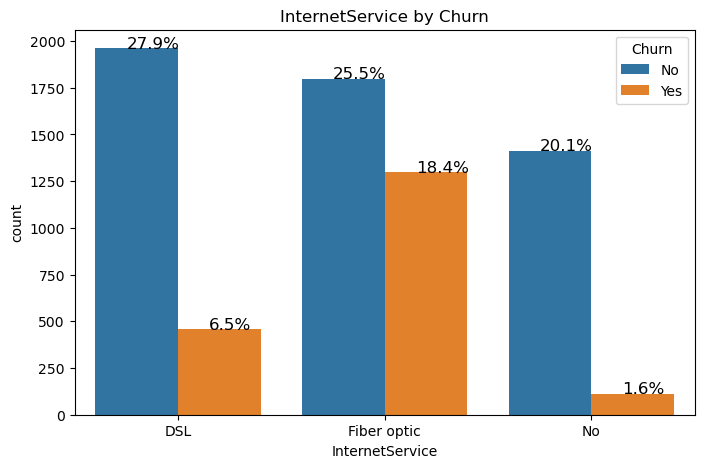

In [92]:
plt.figure(figsize=(8,5))
ax = sb.countplot(x='InternetService',hue='Churn',data=data)
plt.title('InternetService by Churn')
perc_plot(ax,data.InternetService);

The analysis of internet service types by churn revealed a notable discrepancy in churn rates. Specifically, fiber optic service exhibited a very high churn rate of 18.4%, contrasting with DSL at 6.5% and No internet service at 1.6%. Interestingly, all three categories showed significant rates of non-churning, with figures of 27.8%, 25.6%, and 20.0%, respectively

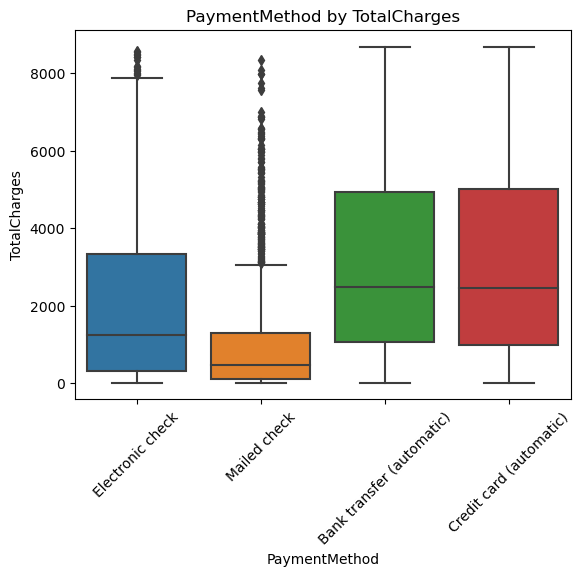

In [93]:
sb.boxplot(x='PaymentMethod',y='TotalCharges',data=data)
plt.title('PaymentMethod by TotalCharges')
plt.xticks(rotation=45);

In this analysis, individuals who pay via bank transfer and credit card exhibit higher total charges compared to those who pay via electronic check, although with the presence of outliers. Again, individuals who opt for payment through mailed check demonstrate notably lower total charges, accompanied by a significant number of outliers.

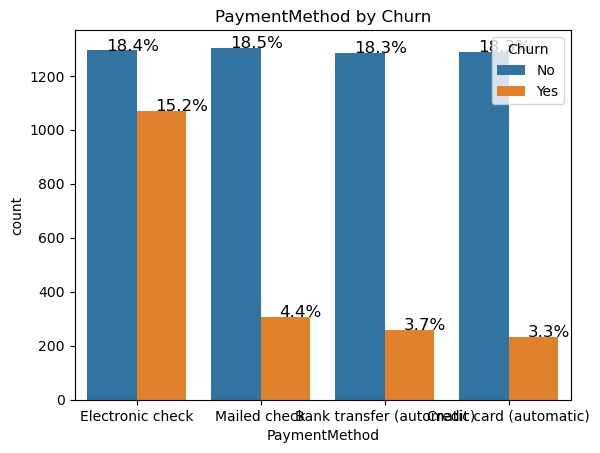

In [94]:
ax = sb.countplot(x='PaymentMethod',hue='Churn',data=data)
plt.title('PaymentMethod by Churn')
perc_plot(ax,data.InternetService);

In this view, there appears to be nearly equal distribution among payment methods. However, the electronic check payment method stands out with a remarkably high churn rate compared to the other payment methods. The remaining three payment methods record churn rates of 4.4%, 3.7%, and 3.3% respectively

## Multivariate analysis

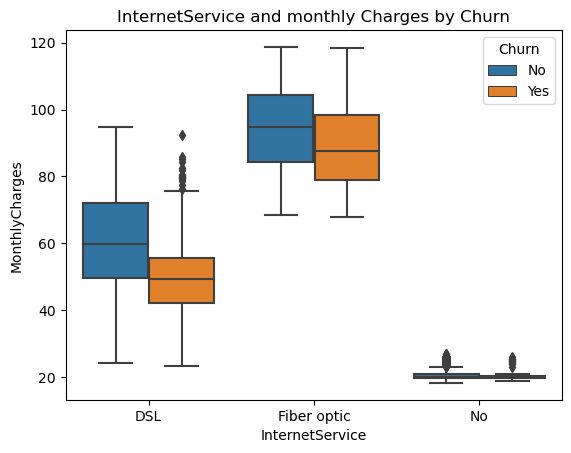

In [95]:
sb.boxplot(x='InternetService',y='MonthlyCharges',hue='Churn',data=data)
plt.title('InternetService and monthly Charges by Churn');


Previous observations highlighted that individuals with fiber optic internet service experience a higher churn rate compared to other services. Building on this, this analysis reveals that this group of people using fiber optic internet service tends to pay higher monthly charges. This observation suggests that the high monthly charges associated with fiber optic service could contribute to the elevated churn rate.

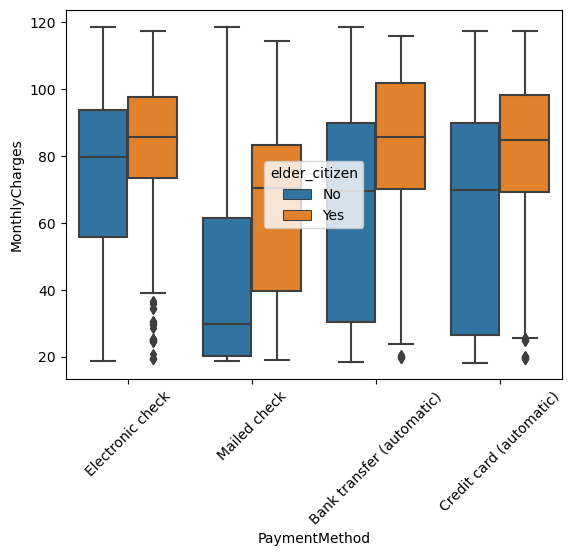

In [96]:
sb.boxplot(x='PaymentMethod',y='MonthlyCharges',hue='elder_citizen',data=data)
plt.xticks(rotation=45);

Initially, we observed that both bank transfer and credit card methods of payment incur the highest monthly charges, followed by electronic check and mailed check methods, which have the lowest monthly charges. Interestingly, across all payment methods, elder citizens tend to have higher monthly charges compared to young citizens."

In [97]:
num_var = data.select_dtypes(exclude ="object")

In [98]:
num_var.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [99]:
num = data[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']]

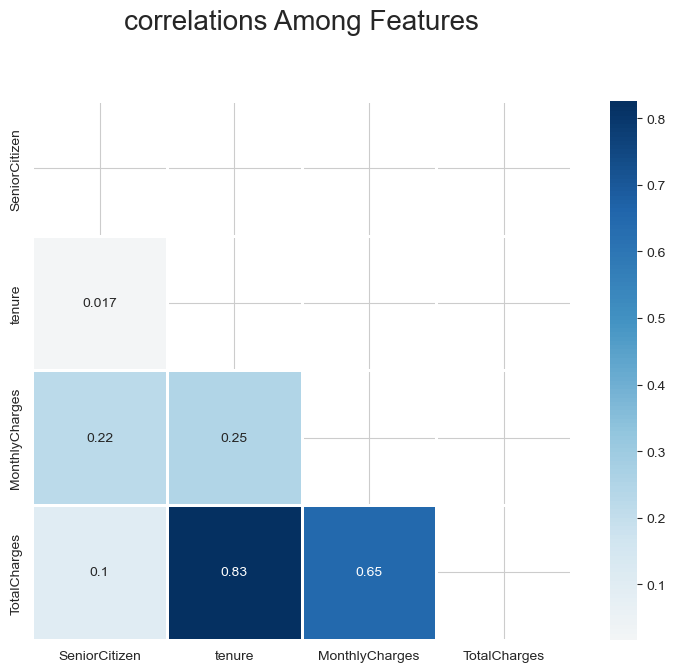

In [100]:
## heatmeap to see the correlation between features.
# Generate a mask for the upper triangle (taken from seaborn example gallery

mask = np.zeros_like(num.corr(), dtype= bool)

mask[np.triu_indices_from(mask)] = True
sb.set_style('whitegrid')
plt.subplots(figsize =(10,7))
sb.heatmap(num.corr(),
          annot = True,
          mask = mask,
          cmap ='RdBu',
          linewidths=.9,
          linecolor='white',
          fmt='.2g',
          center=0,
          square=True)
plt.title("correlations Among Features",y = 1.03,fontsize = 20, pad =40);

A robust correlation of 0.83 is noted between tenure and Totalcharges, indicating a strong relationship. Similarly, monthly charges and total charges demonstrate a correlation of 0.65, suggesting a moderately strong association. In contrast, the remaining features exhibit weak correlations with each other.


C:\Users\kaoth\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


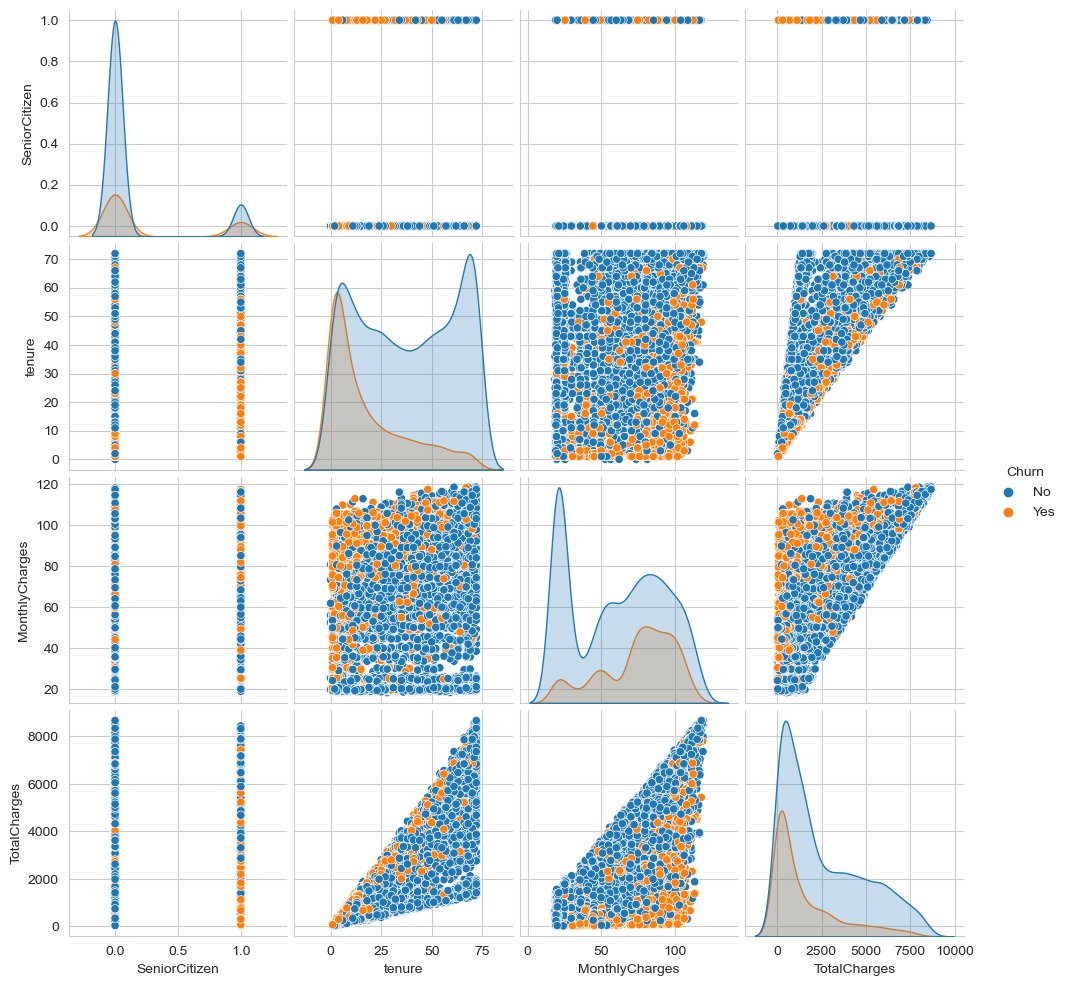

In [101]:
sb.pairplot(data,hue ='Churn')

### CLASSIFICATION ANALYSIS

### Phase 1
- Preparing and Processing Data for Modelling
- variable encoding
- segment data
- scale & nomalize data

In [102]:
#Data cleaning
#identifying missing data points and handling them
data.dropna( inplace=True)

In [103]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
elder_citizen       0
tenure_range        0
dtype: int64

In [104]:
# Drop customerID
data2 = data.drop(["customerID","elder_citizen"],axis=1)
data3 = data2.copy()

data2.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_range
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Short term tenure
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,Medium term tenure


In [105]:
#importing libraries for encoding
from sklearn.preprocessing import LabelEncoder

In [106]:
data2.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
tenure_range         object
dtype: object

In [107]:
#collect all categorical data
cat_var = data2.dtypes == "object"
cat_feat = list(cat_var[cat_var].index)

cat_feat

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn',
 'tenure_range']

In [108]:
# encoding categorical data into numeriacal data 
cat_var = data2.dtypes == "object"
cat_feat = list(cat_var[cat_var].index)

encoder = LabelEncoder()
for x in cat_feat:
    data2[x] = data2[[x]].apply(encoder.fit_transform)
    
data2    

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_range
0,0,0,1,0,1,0,1,0,0,2,...,0,0,0,0,1,2,29.85,29.85,0,2
1,1,0,0,0,34,1,0,0,2,0,...,0,0,0,1,0,3,56.95,1889.50,0,1
2,1,0,0,0,2,1,0,0,2,2,...,0,0,0,0,1,3,53.85,108.15,1,2
3,1,0,0,0,45,0,1,0,2,0,...,2,0,0,1,0,0,42.30,1840.75,0,1
4,0,0,0,0,2,1,0,1,0,0,...,0,0,0,0,1,2,70.70,151.65,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,...,2,2,2,1,1,3,84.80,1990.50,0,1
7039,0,0,1,1,72,1,2,1,0,2,...,0,2,2,1,1,1,103.20,7362.90,0,0
7040,0,0,1,1,11,0,1,0,2,0,...,0,0,0,0,1,2,29.60,346.45,0,2
7041,1,1,1,0,4,1,2,1,0,0,...,0,0,0,0,1,3,74.40,306.60,1,2


In [109]:
#segment data set into predictor var
target = data2.pop("Churn")

In [110]:
target.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int32

In [111]:
# Data Normalisation and dealing with outliers

#import scaler from library
from sklearn.preprocessing import MinMaxScaler

In [112]:
#instantiate the scaler object
scaler = MinMaxScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data2),columns=data2.columns)
scaled_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,tenure_range
0,0.0,0.0,1.0,0.0,0.000000,0.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.115423,0.001275,1.0
1,1.0,0.0,0.0,0.0,0.464789,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.5,0.0,1.000000,0.385075,0.215867,0.5
2,1.0,0.0,0.0,0.0,0.014085,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.354229,0.010310,1.0
3,1.0,0.0,0.0,0.0,0.619718,0.0,0.5,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.5,0.0,0.000000,0.239303,0.210241,0.5
4,0.0,0.0,0.0,0.0,0.014085,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.521891,0.015330,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1.0,0.0,1.0,1.0,0.323944,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.5,1.0,1.000000,0.662189,0.227521,0.5
7028,0.0,0.0,1.0,1.0,1.000000,1.0,1.0,0.5,0.0,1.0,1.0,0.0,1.0,1.0,0.5,1.0,0.333333,0.845274,0.847461,0.0
7029,0.0,0.0,1.0,1.0,0.140845,0.0,0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.112935,0.037809,1.0
7030,1.0,1.0,1.0,0.0,0.042254,1.0,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.558706,0.033210,1.0


### PHASE 2

- Splitting data into training and evaluation datasets
- Implementing Machine Learning/model Building and Training
- creating a predictions file


In [113]:
#split data into training and validation sets
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(scaled_data,target,test_size=0.3,random_state=42)

### Building a base classifier model

- Naive bayes classifier
- Random forest classifier
- Xgboost classifier
- SVM classifier (support vector machine)



In [114]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [115]:
#import models to use
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from xgboost import XGBClassifier


In [116]:
#instantiate naive bayes
nb_mod = GaussianNB()

#fit on training data set
nb_mod.fit(x_train,y_train)


GaussianNB()

In [117]:
#Creating predictions
nb_pred = nb_mod.predict(x_test)
#nb_pred

In [118]:
#instantiate  Random Forest Classifier
rf_mod = RandomForestClassifier()

rf_mod.fit(x_train,y_train)

RandomForestClassifier()

In [119]:
rf_pred = rf_mod.predict(x_test)
#rf_pred

In [120]:
#instantiate support random classifier
sv_mod = svm.SVC()

sv_mod.fit(x_train,y_train)

SVC()

In [121]:
sv_pred =  sv_mod.predict(x_test)
#sv_pred

In [122]:
#instantiate Xgboost Classifier()
xgboost_mod = XGBClassifier()

xgboost_mod.fit(x_train,y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [123]:
xgboost_pred = xgboost_mod.predict(x_test)
#xgboost_pred

### Phase 3
- model evaluation and interpretation phase
- metrics to use for classification problems;
 >confusion matrix, 
 >classification report

In [124]:
#import metrics to use from sklearn
from sklearn.metrics import classification_report, confusion_matrix

#a helpful functin that helps us visualize the connfusion matrix
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sb.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### FOR NAIVE BAYES MODEL

In [125]:
#model evaluation for naive bayes model
print("Naive Bayes Model accuracy:\n", classification_report(y_test,nb_pred))

Naive Bayes Model accuracy:
               precision    recall  f1-score   support

           0       0.89      0.75      0.81      1549
           1       0.51      0.74      0.61       561

    accuracy                           0.75      2110
   macro avg       0.70      0.74      0.71      2110
weighted avg       0.79      0.75      0.76      2110



Naive Bayes Model Confusion Matrix


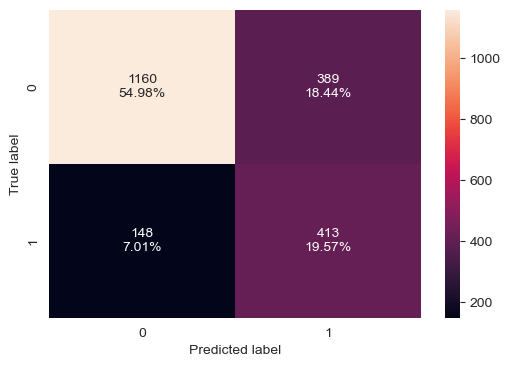

In [126]:
#visualize confusion matrix for the naive bayes model
confusion_matrix_sklearn(nb_mod,x_test,y_test)
print("Naive Bayes Model Confusion Matrix")

### Random forest

In [127]:
#model evaluation for Random forest
print("Random forest Model accuracy:\n", classification_report(y_test,rf_pred))


Random forest Model accuracy:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1549
           1       0.63      0.48      0.54       561

    accuracy                           0.79      2110
   macro avg       0.73      0.69      0.70      2110
weighted avg       0.77      0.79      0.78      2110



Random forest Model Confusion Matrix


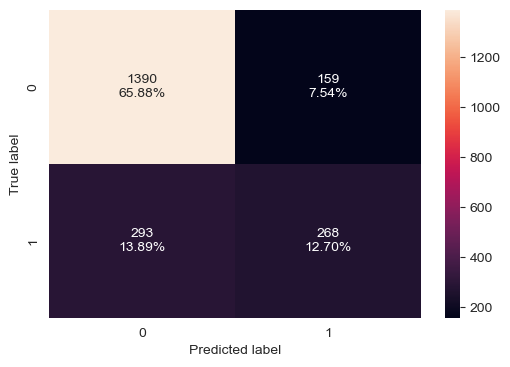

In [128]:
#visualize confusion matrix for the random forest model
confusion_matrix_sklearn(rf_mod,x_test,y_test)
print("Random forest Model Confusion Matrix")

### For the Support Vector Model Model

In [129]:
#model evaluation for the SVM model
print("SVM Model accuracy:\n", classification_report(y_test,sv_pred))

SVM Model accuracy:
               precision    recall  f1-score   support

           0       0.83      0.92      0.87      1549
           1       0.67      0.47      0.56       561

    accuracy                           0.80      2110
   macro avg       0.75      0.69      0.71      2110
weighted avg       0.79      0.80      0.79      2110



Support Vector Model Confusion Matrix


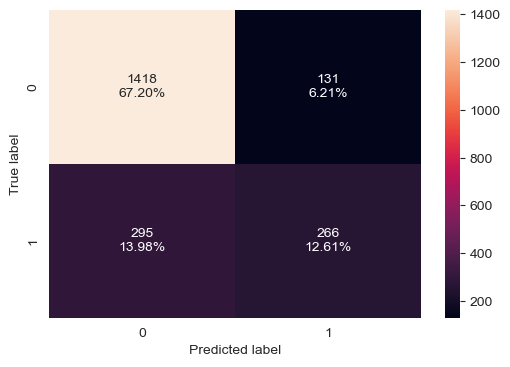

In [130]:
#visualize confusion matrix for the random foresrt model
confusion_matrix_sklearn(sv_mod,x_test,y_test)
print("Support Vector Model Confusion Matrix")

### For xgboost Model

In [131]:
#model evaluation for the SVM model
print("Xgboost Model accuracy:\n", classification_report(y_test,sv_pred))

Xgboost Model accuracy:
               precision    recall  f1-score   support

           0       0.83      0.92      0.87      1549
           1       0.67      0.47      0.56       561

    accuracy                           0.80      2110
   macro avg       0.75      0.69      0.71      2110
weighted avg       0.79      0.80      0.79      2110



Xgboost Model Confusion Matrix


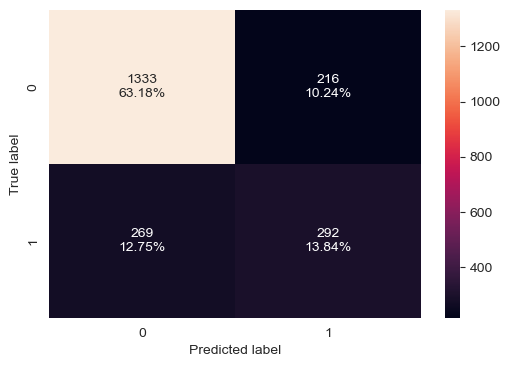

In [132]:
#visualize confusion matrix for the Xgboost model
confusion_matrix_sklearn(xgboost_mod,x_test,y_test)
print("Xgboost Model Confusion Matrix")

In [133]:
#comparing model metrics and selecting best performing model
Header = ["Precision","Recall","F1-score","Accuracy"]
Evaluation_matrix =  [[ 0.70,0.75,0.71,0.75 ], [0.72,0.69,0.70,0.78], [0.74,0.69,0.70,0.79 ],[ 0.74,0.69,0.70,0.79]]
model = ["Naive Bayes","Random Forest","Support Vector","Xgboost"]

Compared_EM= pd.DataFrame(data=Evaluation_matrix,columns=Header,index = model)
Compared_EM

,Precision,Recall,F1-score,Accuracy
Naive Bayes,0.70,0.75,0.71,0.75
Random Forest,0.72,0.69,0.70,0.78
Support Vector,0.74,0.69,0.70,0.79
Xgboost,0.74,0.69,0.70,0.79


When comparing all five models' evaluation metrics, both Support Vector and XGBoost exhibit identical precision, recall, F1 score, and accuracy. These two models outperform the Naive Bayes and Random Forest models.

### PHASE 4
- Model Optimization/ Hyperparameter tunning phase

In [134]:
from sklearn.model_selection import KFold, cross_val_score, RandomizedSearchCV

#Set up kfold cross-validation
cv = KFold(n_splits=5, random_state=42, shuffle=True)

# set up the grid to modify hyper parameters from
grid1 ={
    "n_estimators": [50,100,150],
    "max_features": [7, 10, 15],
    "min_samples_leaf": [1, 5, 20, 100],
    "min_samples_split": [2, 10, 50, 250],
    "criterion": ["gini","entropy"],
    "max_depth": [4, 6, 8, 10, None]
}

# Find the best hyperparameter combination to optimize the R2 metric
xgboost_mod_search=RandomizedSearchCV(
    estimator=xgboost_mod,
    param_distributions=grid1,
    n_iter=200,
    refit=True,
    return_train_score=True,
    cv=cv,    
    verbose=10,
    n_jobs=-1,
    random_state=42
)

In [135]:
#Here we fit our "optimized model" on the training data set and train the model again
%time tuned_xgboost_model = xgboost_mod_search.fit(x_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
CPU times: total: 1min 33s
Wall time: 42 s


C:\Users\kaoth\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [07:58:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion", "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


In [136]:
# we can print out and obseverve the best paramters for the model by using the 
tuned_xgboost_model.best_params_

{'n_estimators': 50,
 'min_samples_split': 250,
 'min_samples_leaf': 100,
 'max_features': 15,
 'max_depth': 4,
 'criterion': 'gini'}

In [137]:
#creating a prediction
tuned_xgboost_pred = tuned_xgboost_model.predict(x_test)
#tuned_xgboost_pred

In [138]:
#model evaluation for the Optimized XGBoost model
print("Optimized XGBoost Model accuracy:\n", classification_report(y_test,tuned_xgboost_pred))

Optimized XGBoost Model accuracy:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1549
           1       0.64      0.53      0.58       561

    accuracy                           0.79      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.78      0.79      0.79      2110



Tuned Xgboost Model Confusion Matrix


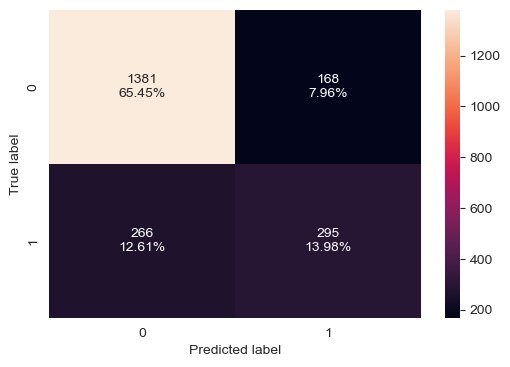

In [139]:
#visualize confusion matrix for the optimized XGBoost model
confusion_matrix_sklearn(tuned_xgboost_model,x_test,y_test)
print("Tuned Xgboost Model Confusion Matrix")

#### Support Vector Optimisation model

In [140]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10], 
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4],
    'class_weight': [None, 'balanced'] 
}


sv_mod_search = GridSearchCV(
            estimator=sv_mod,
            param_grid=param_grid, 
            cv=5, 
            scoring='accuracy',
            n_jobs=-1)


In [141]:
#Here we fit our "optimized model" on the training data set and train the model again
%time tuned_sv_model = sv_mod_search.fit(x_train, y_train)

CPU times: total: 3.39 s
Wall time: 1min 15s


In [142]:
#creating a prediction
tuned_sv_pred = tuned_sv_model.predict(x_test)
#tuned_xgboost_pred

In [143]:
#model evaluation for the Optimized Support Vector model
print("Optimized Support Vector Model accuracy:\n", classification_report(y_test,tuned_sv_pred))

Optimized Support Vector Model accuracy:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1549
           1       0.64      0.52      0.57       561

    accuracy                           0.79      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.78      0.79      0.79      2110



Tuned support vector Model Confusion Matrix


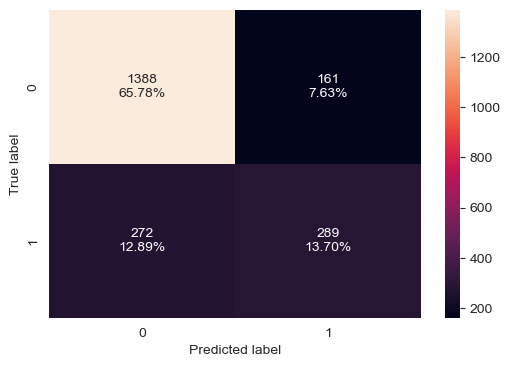

In [144]:
#visualize confusion matrix for the Vector Model forest model
confusion_matrix_sklearn(tuned_sv_model,x_test,y_test)
print("Tuned support vector Model Confusion Matrix")

In [145]:
#comparing optimed model metrics and selecting best performing model
Header2 = ["Precision","Recall","F1-score","Accuracy"]
Evaluation_matrix2 = [[0.74,0.69,0.70,0.79],[ 0.74,0.69,0.70,0.79],[0.75,0.69,0.71,0.80],[0.74,0.71,0.72,0.79]]
model2 = ["Support Vector Model","XGBoost Model","Optimized Support Vector Model","Optimized XGBoost Model"]

Optimised_EM= pd.DataFrame(data=Evaluation_matrix2,columns=Header2,index = model2)
Optimised_EM

,Precision,Recall,F1-score,Accuracy
Support Vector Model,0.74,0.69,0.70,0.79
XGBoost Model,0.74,0.69,0.70,0.79
Optimized Support Vector Model,0.75,0.69,0.71,0.80
Optimized XGBoost Model,0.74,0.71,0.72,0.79


After Optimising both support vector and Xgboost model, the SVM got well improved based on accuracy(from 0.79-0.80) , FN score from (14.41% - 13.93%). The company should be more foccused on improving the FN result rather than the TP. A high FN score will give a false impression of the churning rate, hence they should be more concerned with a high FN.

In [146]:
#feature Importance to detect which features are the most important predicators
X = data2
Y = target

In [147]:
xgb = XGBClassifier()

xgb.fit(X,Y)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [148]:
xgb.feature_importances_

array([0.0174864 , 0.01876725, 0.01623506, 0.01657026, 0.02846881,
       0.0404458 , 0.02067943, 0.15428934, 0.08367405, 0.02335327,
       0.01736798, 0.04746864, 0.01611223, 0.02363024, 0.3971126 ,
       0.02017576, 0.01846054, 0.0206589 , 0.01904336, 0.        ],
      dtype=float32)

In [149]:
pd.Series(xgb.feature_importances_, index=X.columns).nlargest(10)


Contract           0.397113
InternetService    0.154289
OnlineSecurity     0.083674
TechSupport        0.047469
PhoneService       0.040446
tenure             0.028469
StreamingMovies    0.023630
OnlineBackup       0.023353
MultipleLines      0.020679
MonthlyCharges     0.020659
dtype: float32

### Actionable Insights 

- In conclusion,Factors such as contract type, lack of tech support, absence of internet support, reliance solely on phone service, lack of online security measures, specific internet services,tenure and payment methods significantly influence customer churn behavior.
- Furthermore, in the multivariate analysis of numerical values A robust correlation of 0.83 is noted between tenure and total charges indicating a strong relationship
- XGB model demonstrate a high f1 score of 0.72% in predicting churn based on our validation tests
- The model built will be used on a new dataset to accurately forecast which customers are likely to churn 


### Recommendations

- Invest in improving tech support services to address customer queries and concerns more efficiently, reducing frustration and the likelihood of churn
- Increase availability and reliability of internet support services to ensure customers have consistent access to assistance and troubleshooting.
- Implement robust online security measures to protect customer data and privacy, reassuring them of the safety of their online interactions and transactions.
- Highlight the benefits and advantages of specific internet services, such as fiber-optic internet, to attract and retain customers seeking high-speed, reliable connectivity.
- Offer a wider range of payment methods to accommodate diverse customer preferences and streamline payment processes, making it easier for customers to manage their accounts and reduce churn.
- Consider revising pricing structures to ensure they align with customer expectations and budget constraints, potentially offering more flexible options or discounts to mitigate the impact of rising total charges on churn behavior.
- If there is a steady influx of new data, updating the model more frequently can help incorporate the latest trends and patterns
- Monitor the model’s performance over time. If there is a noticeable decline in accuracy or predictive power. It may be time to update the model


In [150]:
#Productionizing the best performing model
# Serializing the best model for subsequent and easy usage

import joblib

filename = './optimized_mod.pkl'

# Save the model as a pickle file
joblib.dump(tuned_sv_model,filename)



['./optimized_mod.pkl']